*Credits: materials from this notebook belong to YSDA [Practical DL](https://github.com/yandexdataschool/Practical_DL) course. Special thanks for making them available online.*

# Lab assignment №1, part 1

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

## 1. Matrix differentiation

Since it easy to google every task please please please try to undestand what's going on. The "just answer" thing will be not counted, make sure to present derivation of your solution. It is absolutely OK if you found an answer on web then just exercise in $\LaTeX$ copying it into here.

Useful links:
- [Matrix Differentiation (EN)](http://www.atmos.washington.edu/~dennis/MatrixCalculus.pdf)
- [Матричные вычисления (RU)](http://www.machinelearning.ru/wiki/images/2/2a/Matrix-Gauss.pdf)

## Exercise 1

$$  
y = x^Tx,  \quad x \in \mathbb{R}^N 
$$

$$
\frac{dy}{dx} = 
$$ 

Видимо, $dy/dx$ -- это такое чудовищное обозначение для вектора частных производных. Чтож, пожалуйте:

$$ \partial y /\partial x_i = \partial (\sum x_i^2) / \partial x_i = 2x_i$$

Значит, 

$$dy/dx = 2x$$

## Exercise 2

$$ y = tr(AB) \quad A,B \in \mathbb{R}^{N \times N} $$ 

$$
\frac{dy}{dA} =
$$

$$ y = \sum_i \sum_j A_{ij} B_{ji} $$
$$ \partial y / \partial A_{ij} = B_{ji} $$
$$ dy/dA = B^T $$

## Exercise 3

$$  
y = x^TAc , \quad A\in \mathbb{R}^{N \times N}, x\in \mathbb{R}^{N}, c\in \mathbb{R}^{N} 
$$

$$
(\frac{dy}{dx})_i = \frac{\partial y}{\partial x_i} = \frac{\partial (\sum_i \sum_j x_i A_{ij} c_j)}{\partial x_i} = \sum_j A_{ij}c_j 
$$

$$
dy/dx = Ac
$$

$$
(\frac{dy}{dA})_{ij} = \frac{\partial y}{\partial A_{ij}} = \frac{\partial(\sum_i \sum_j x_i A_{ij} c_j)}{\partial A_{ij}} = x_ic_j
$$ 

$$
dy/dA = xc^T
$$



Hint for the latter (one of the ways): use *ex. 2* result and the fact 
$$
tr(ABC) = tr (CAB)
$$

## Exercise 4

Classic matrix factorization example. Given matrix $X$ you need to find $A$, $S$ to approximate $X$. This can be done by simple gradient descent iteratively alternating $A$ and $S$ updates.
$$
J = || X - AS ||_F^2  , \quad A\in \mathbb{R}^{N \times R} , \quad S\in \mathbb{R}^{R \times M}
$$
$$
\frac{dJ}{dS} = ? 
$$

You may use one of the following approaches:

#### First approach
Using ex.2 and the fact:
$$
|| X ||_F^2 = tr(XX^T) 
$$ 
it is easy to derive gradients (you can find it in one of the refs). 

#### Second approach
You can use *slightly different techniques* if they suits you. Take a look at this derivation:
<img src="grad.png">

(excerpt from [Handbook of blind source separation, Jutten, page 517](https://books.google.ru/books?id=PTbj03bYH6kC&printsec=frontcover&dq=Handbook+of+Blind+Source+Separation&hl=en&sa=X&ved=0ahUKEwi-q_apiJDLAhULvXIKHVXJDWcQ6AEIHDAA#v=onepage&q=Handbook%20of%20Blind%20Source%20Separation&f=false), open for better picture).

#### Third approach
And finally we can use chain rule! 
let $ F = AS $ 

**Find**
$$
\frac{dJ}{dF} =  
$$ 
and 
$$
\frac{dF}{dS} =  
$$ 
(the shape should be $ NM \times RM )$.

Now it is easy do get desired gradients:
$$
\frac{dJ}{dS} =  
$$ 

## 2. kNN questions
Here come the questions from the assignment0_01. Please, refer to the assignment0_01 to get the context of the questions.

### Question 1

Notice the structured patterns in the distance matrix, where some rows or columns are visible brighter. (Note that with the default color scheme black indicates low distances while white indicates high distances.)

- What in the data is the cause behind the distinctly bright rows?
- What causes the columns?

*Your Answer:*




### Question 2

We can also use other distance metrics such as L1 distance.
For pixel values $p_{ij}^{(k)}$ at location $(i,j)$ of some image $I_k$, 

the mean $\mu$ across all pixels over all images is $$\mu=\frac{1}{nhw}\sum_{k=1}^n\sum_{i=1}^{h}\sum_{j=1}^{w}p_{ij}^{(k)}$$
And the pixel-wise mean $\mu_{ij}$ across all images is 
$$\mu_{ij}=\frac{1}{n}\sum_{k=1}^np_{ij}^{(k)}.$$
The general standard deviation $\sigma$ and pixel-wise standard deviation $\sigma_{ij}$ is defined similarly.

Which of the following preprocessing steps will not change the performance of a Nearest Neighbor classifier that uses L1 distance? Select all that apply.
1. Subtracting the mean $\mu$ ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu$.)
2. Subtracting the per pixel mean $\mu_{ij}$  ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu_{ij}$.)
3. Subtracting the mean $\mu$ and dividing by the standard deviation $\sigma$.
4. Subtracting the pixel-wise mean $\mu_{ij}$ and dividing by the pixel-wise standard deviation $\sigma_{ij}$.
5. Rotating the coordinate axes of the data.

*Your Answer:* 123


*Your Explanation:*
1. Let $\tilde I$ be the image minus the mean, and same for the query. $|\widetilde{query} - \tilde{I}| = |(query - \mu) - (I - \mu)| = |query - I|$
2. In point 1 all of $\mu$'s coordinates were equal. In point 2, it is not so, but literally the same argument applies, obviously.
3. Subtracting a vector from all points doesn't change kNN performance, as shown in 1. Neither does dividing by the same number, obviously.
4. Counterexample below. The origin's closest neigbour changes after scaling
5. Rotation does not preserve L1 metric, see drawing below: after 45 degree rotation around origin, a point that was on the unit circle appears outside of it, and the one that was outside of it appears on it. Thus the closest neighbour to the origin changed after the rotation




In [23]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Illustration to 4')

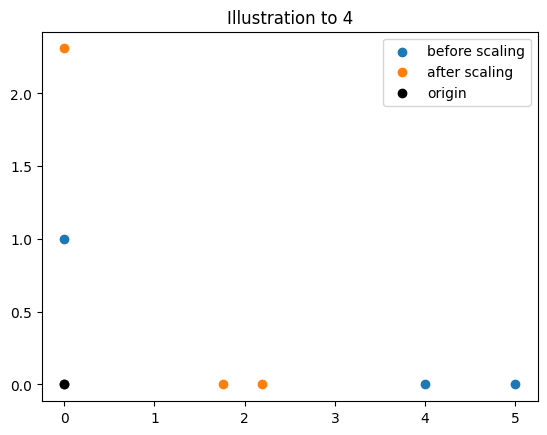

In [31]:
X = np.array([[0, 0], [0, 1], [4, 0], [5, 0]])
plt.scatter(X[:, 0], X[:, 1], label='before scaling')
sigma = np.array([X[:, 0].std(), X[:, 1].std()])
X = X / sigma
plt.scatter(X[:, 0], X[:, 1], label='after scaling')
plt.scatter([0], [0], color='black', label='origin')
plt.legend()
plt.title('Illustration to 4')

Text(0.5, 1.0, 'Illustration to 5')

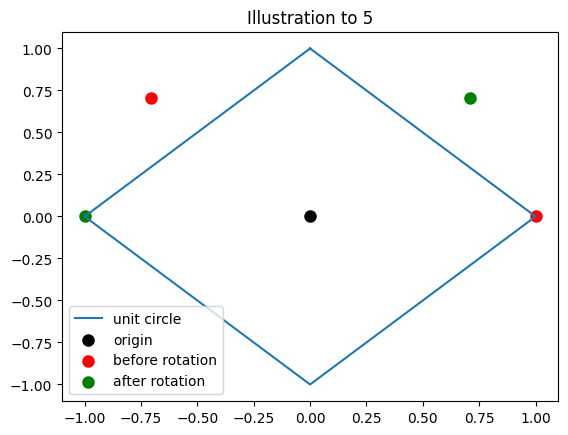

In [20]:
plt.plot([0, 1, 0, -1, 0], [1, 0, -1, 0, 1], label='1-sphere')
plt.scatter(x=[0], y=[0], linewidths=3, color='black', label='origin')
plt.scatter(x=[1,-1/np.sqrt(2)], y=[0,1/np.sqrt(2)], linewidths=3, color='red', label='before rotation')
# apply 45 degree rotation around origin, counterclockwise
plt.scatter(x=[1/np.sqrt(2), -1], y=[1/np.sqrt(2), 0], linewidths=3, color='green', label='after rotation')
plt.legend()

## Question 3

Which of the following statements about $k$-Nearest Neighbor ($k$-NN) are true in a classification setting, and for all $k$? Select all that apply.
1. The decision boundary (hyperplane between classes in feature space) of the k-NN classifier is linear.
2. The training error of a 1-NN will always be lower than that of 5-NN.
3. The test error of a 1-NN will always be lower than that of a 5-NN.
4. The time needed to classify a test example with the k-NN classifier grows with the size of the training set.
5. None of the above.

*Your Answer:* 42


*Your Explanation:*
1. See kNN examples in part3 --- they are not linear. And they have no reason to be linear: the minimum of distances from train points does not yield a linear function.
2. If no two points coincide (which is a very reasonable requirement for not multi-label classification), 1NN's training error is always zero, and 5NN's might be non zero (imagine a red point surrounded by four blue points, and nothing else in its vicinity.)
3. No, as 1NN reacts to an anomalies (an isolated blue point in a red cloud) and 5NN has a better chance not to notice them
4. Depends on the implementation, of course; but the ones I know --- all do. Brute force complexity obviously grows with the size of training set; k-d-tree-based implementations use splittings, which depend on the size of the tree (=size of training set.)

